<a href="https://colab.research.google.com/github/AndresMontesDeOca/Laboratorio3/blob/main/EDA.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Laboratorio III

## Librerias

In [1]:
import pandas as pd
import numpy as np
from matplotlib import pyplot as plt
import seaborn as sns

import warnings
# warnings.filterwarnings('ignore', category=ValueWarning)
warnings.filterwarnings('ignore')

# Vamos a suprimir la notacion cientifica
pd.set_option("display.float_format", lambda x:"%.2f" %x)


## Carga Datos

In [5]:
# Code to read csv file into Colaboratory:
# !pip install -U -q PyDrive
from pydrive.auth import GoogleAuth
from pydrive.drive import GoogleDrive
from google.colab import auth
from oauth2client.client import GoogleCredentials

# Authenticate and create the PyDrive client.
auth.authenticate_user()
gauth = GoogleAuth()
gauth.credentials = GoogleCredentials.get_application_default()
drive = GoogleDrive(gauth)

################################# Datasets ###################################
# # Ventas
id = "158aOjqxaNO8l97yA6VWJkek_15YVLMhs"
downloaded = drive.CreateFile({'id':id})
downloaded.GetContentFile('sell-in.txt')
data_ventas = pd.read_csv("sell-in.txt", sep="\t")
data_ventas['periodo'] = pd.to_datetime(data_ventas['periodo'], format='%Y%m')
data = data_ventas.copy()

# # Productos
id = "15JS_k86LS0sgJXma7BOVXWlyNcMwxdhE"
downloaded = drive.CreateFile({'id':id})
downloaded.GetContentFile('tb_productos.txt')
data_productos = pd.read_csv("tb_productos.txt", sep="\t")

# # Stocks
id = "15EV-8f_U7onpA1AcTxxXeD-z8yVR4fQu"
downloaded = drive.CreateFile({'id':id})
downloaded.GetContentFile('tb_stocks.txt')
data_stocks = pd.read_csv("tb_stocks.txt", sep="\t")
data_stocks['periodo'] = pd.to_datetime(data_stocks['periodo'], format='%Y%m')

## Analysis

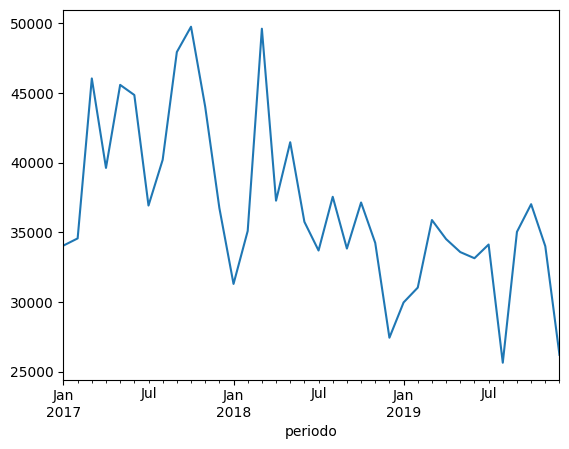

In [4]:
# Generamos la Serie de Tiempo con la suma en toneladas vendidas por mes
data_ts = data_ventas.groupby('periodo').sum()['tn']
data_ts.plot()

plt.show()

### Predicciones para Mayo 2019

In [62]:
# Con los datos de Marzo 2019, predecir cuantas ventas va a haber en Mayo 2019 y calcular el error
display(data)

,periodo,customer_id,product_id,plan_precios_cuidados,cust_request_qty,cust_request_tn,tn
0,2017-01-01,10234,20524,0,2,0.05,0.05
1,2017-01-01,10032,20524,0,1,0.14,0.14
2,2017-01-01,10217,20524,0,1,0.03,0.03
3,2017-01-01,10125,20524,0,1,0.02,0.02
4,2017-01-01,10012,20524,0,11,1.54,1.54
...,...,...,...,...,...,...,...
2945813,2019-12-01,10105,20853,0,1,0.02,0.02
2945814,2019-12-01,10092,20853,0,1,0.01,0.01
2945815,2019-12-01,10006,20853,0,7,0.03,0.03
2945816,2019-12-01,10018,20853,0,4,0.02,0.02


#### Ventas iguales a Marzo 2019

In [63]:
# a) Ventas de Mayo igual a las de Marzo
prediccion_201905_a = data.query('periodo == "2019-03"').groupby('product_id')['tn'].sum()
prediccion_201905_a

product_id
20001   1470.66
20002   1083.63
20003    638.04
20004    619.77
20005    488.21
          ...  
21266      0.02
21267      0.22
21269      0.18
21271      0.01
21276      0.12
Name: tn, Length: 895, dtype: float64

#### Ventas iguales al promedio de los ultimos 6 meses

In [65]:
# Data ultimos 6 meses, solo los campos necesarios
data_6month_avg = data[(data['periodo'] >= '2018-11') & (data['periodo'] <= '2019-04')][['product_id', 'tn']]

# Sumamos y dividimos por 6.
prediccion_201905_b = data_6month_avg.groupby(['product_id'])['tn'].sum() / 6

prediccion_201905_b

product_id
20001   1492.14
20002   1242.89
20003    817.20
20004    571.24
20005    454.77
          ...  
21266      0.06
21267      0.06
21269      0.05
21271      0.01
21276      0.04
Name: tn, Length: 963, dtype: float64